### Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df=pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


We can observe that we we do not need to change the data type as all are float.

In [6]:
dup = df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [7]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

The Data does not contain null values.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


We can observe the basic statistics of the dataset in the table above.

#### Univariate Analysis

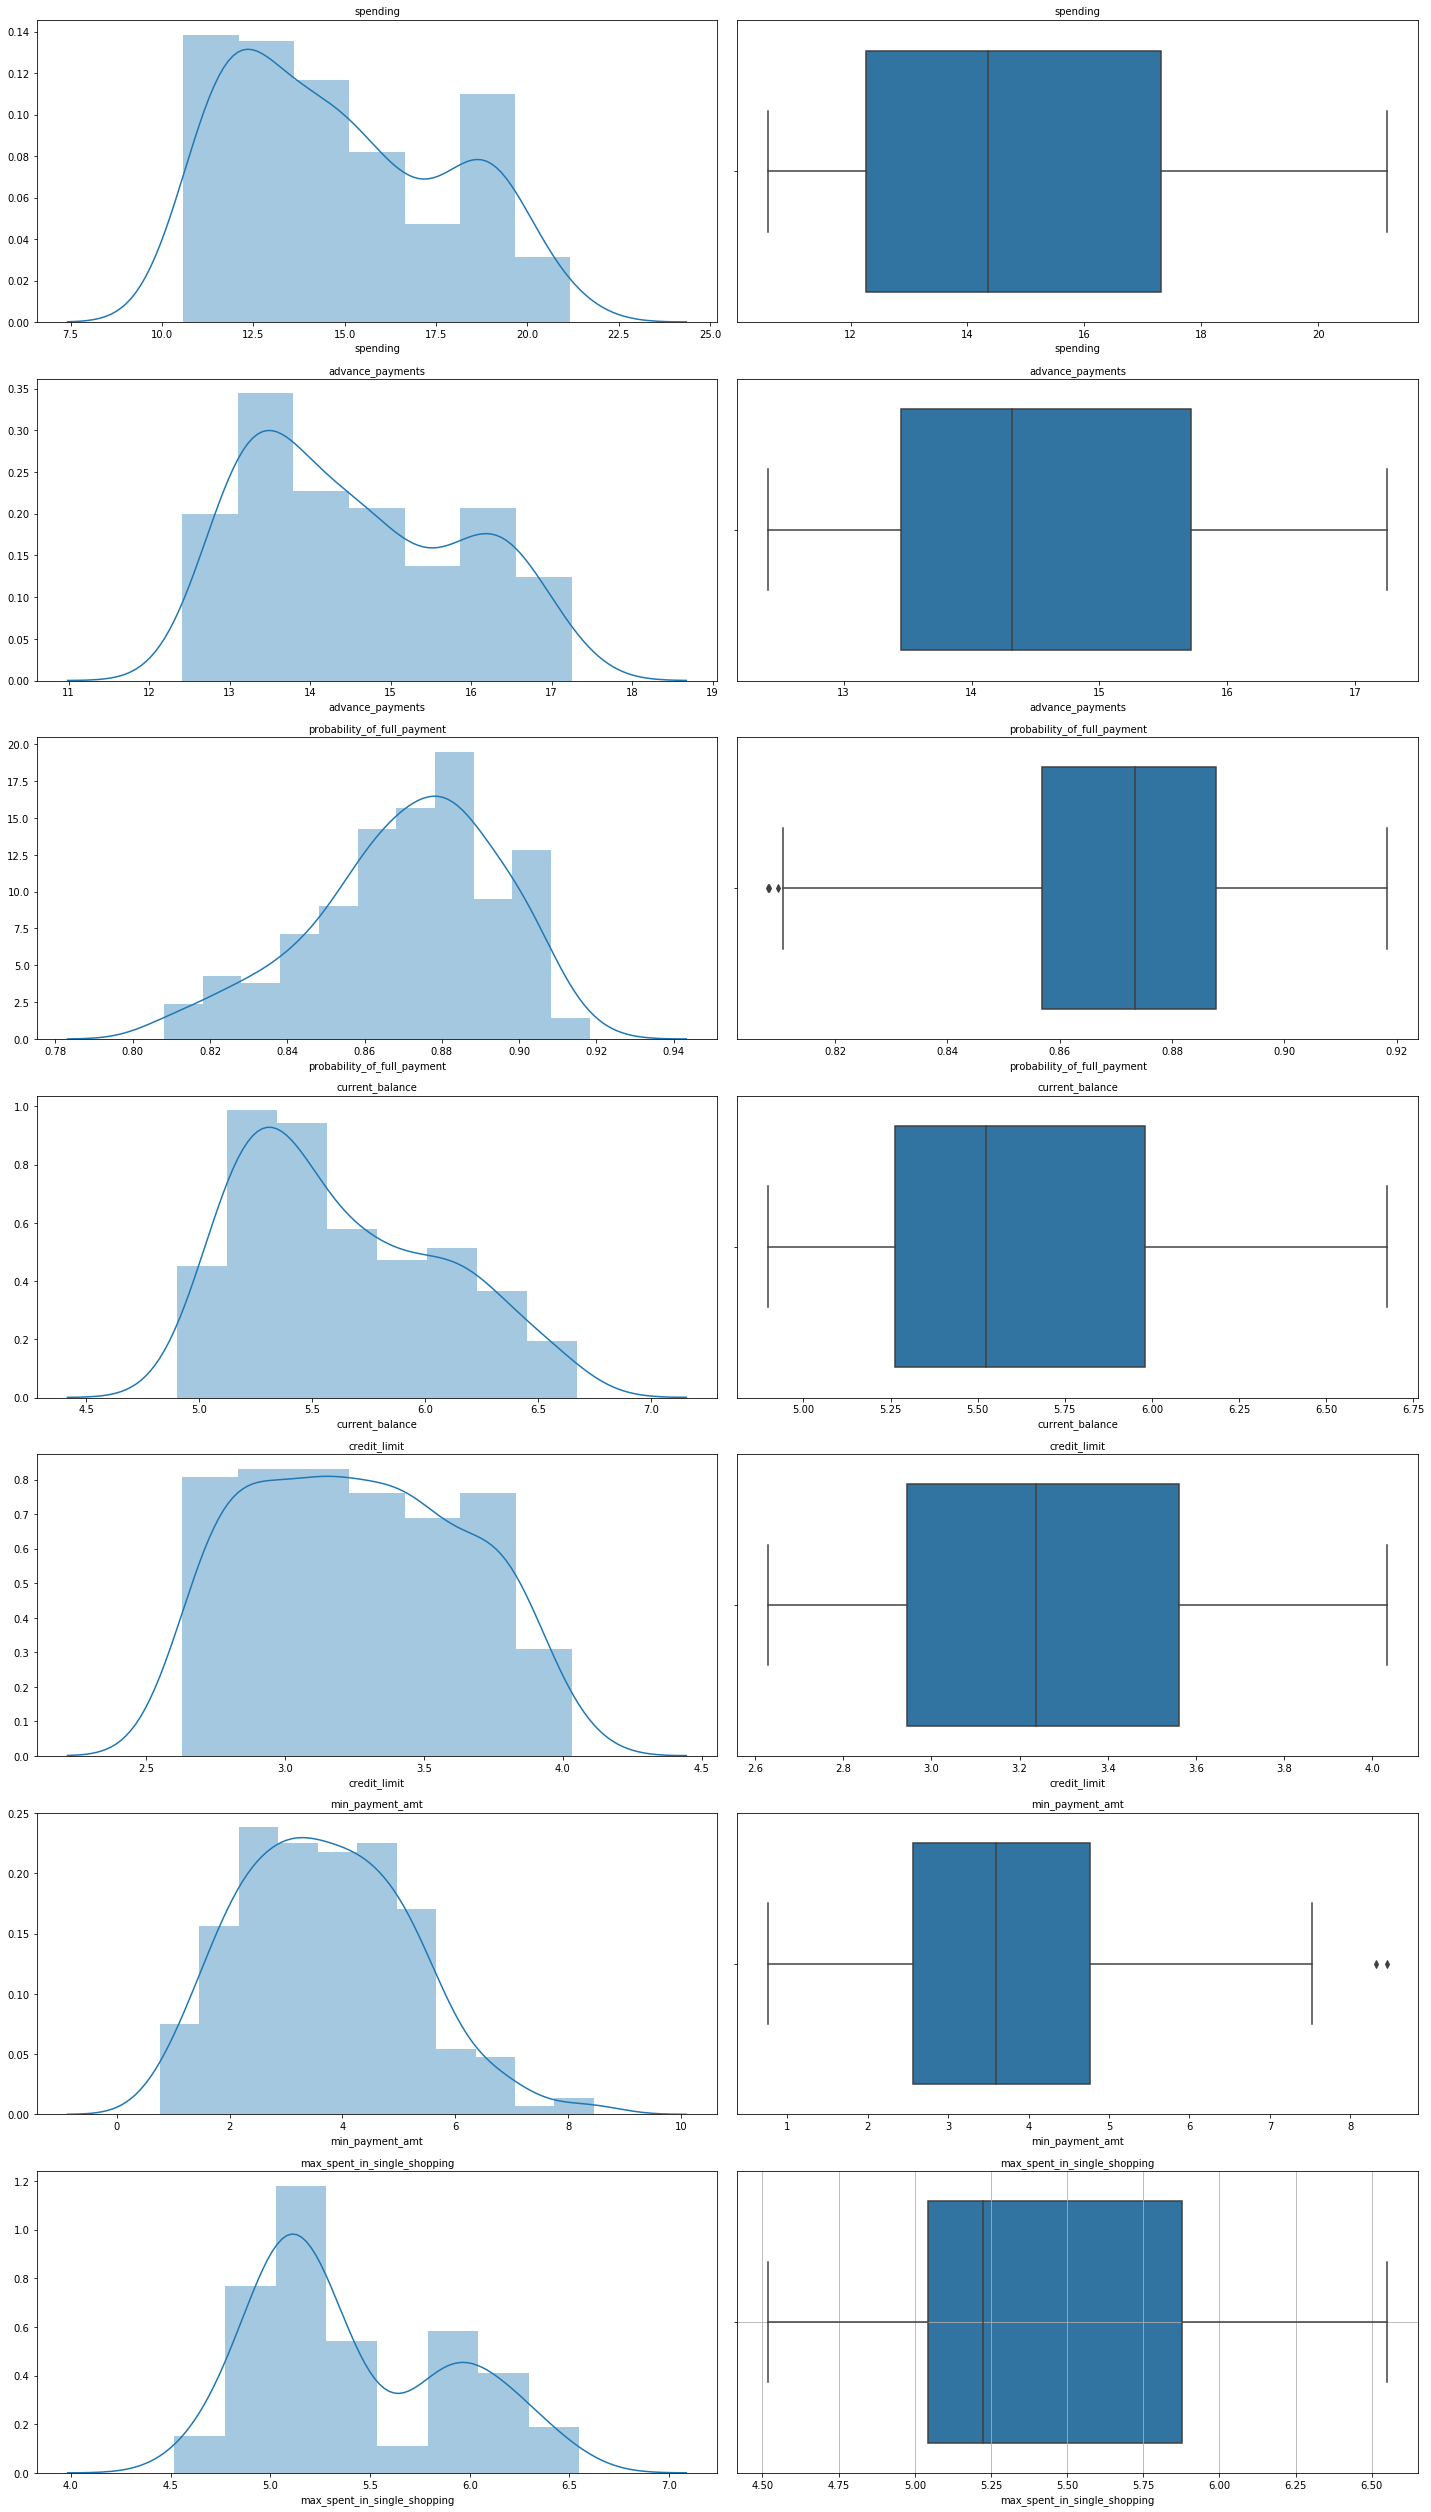

In [9]:
fig, axes = plt.subplots(nrows = 7, ncols = 2)
fig.set_size_inches(20, 35)

cont = df.dtypes[(df.dtypes == 'int64')|(df.dtypes == 'float64')].index

df2 = df[cont]

for i in range(0, len(df2.columns)):
    a = sns.distplot(df2[df2.columns[i]] , ax = axes[i][0])
    a.set_title(df2.columns[i], fontsize = 10)
    a = sns.boxplot(df2[df2.columns[i]] , orient = "h" , ax = axes[i][1])
    a.set_title(df2.columns[i], fontsize = 10)
    plt.grid()

plt.tight_layout()

- Spending : Does not follow normal distribution. Average amount spent by customer is around 14000/month.
- Advance payment : Does not follow normal distribution. Average amount paid by customer is around 1400/month. 
- Probability of full payment : Follows a normal distribution with a slight left skew. 87% of the customers give full payment on time.
- Current balance :  Follows a normal distribution with a slight right skew.
- Credit limit : Does not follow normal distribution.
- Minimum payment amount : Follows a normal distribution with a very slight right skew.
- Maximum spent in single shopping : Does not follow a normal distribution.

We can observe from the dataset that the units are different for all the variables hence it will be difficult to compare. We should follow the approach of standardization/Normalization so that further analysis can be easily done.


#### Bivariate Analysis

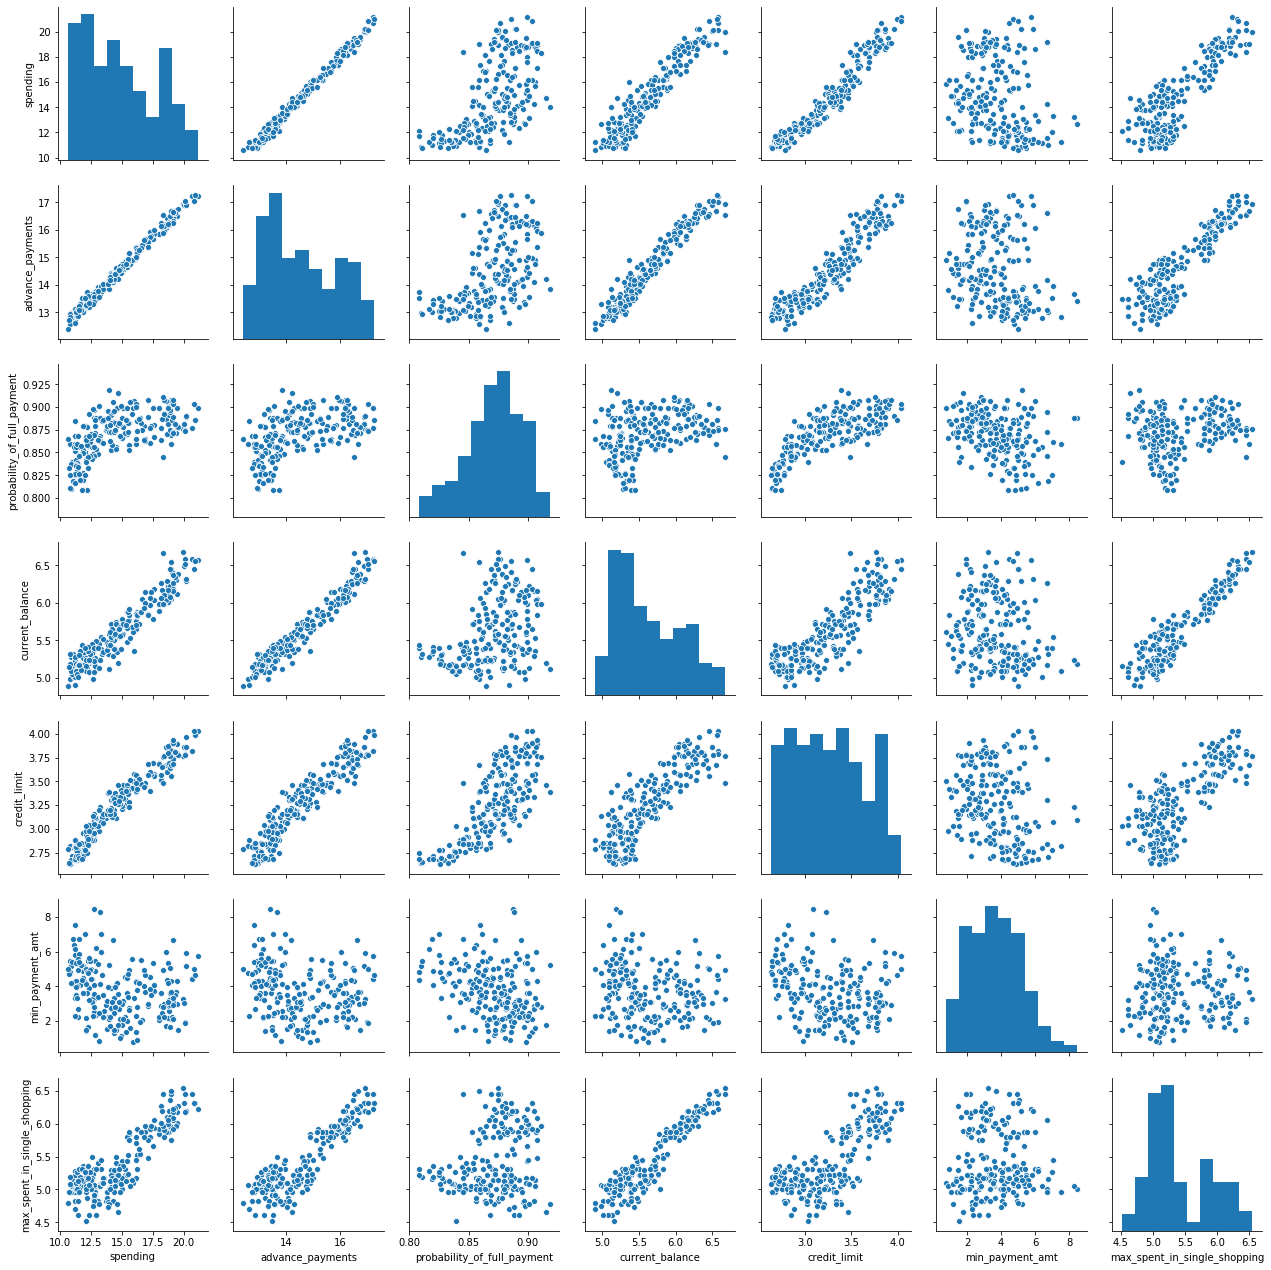

In [10]:
sns.pairplot(df)
plt.show()

1. Spending is directly proportional to advance payment, probability of full payment, current balance, credit limit and max spent in single shopping.
2. If there is increase in spending then the advance payment that the customer pays also increases.
3. The probability of full payment is around 90% when the spending is 20000 per month.
4. Expenditure is directly proportional to credit limit and current balance
5. It follows a similar pattern for max_spent_in_single_shopping, The only aberration is the No pattern found in minimum payment amount.
6. Advance payment is directly proportional to current balance, credit limit, max_spent_in_single_shopping.
7. Credit limit is directly proportional to the spending. advance payment, probability of full payment, min payment amount and max spent in shopping increases. 
8. Current balance directly proportional to spending and advance payment made by the customer.

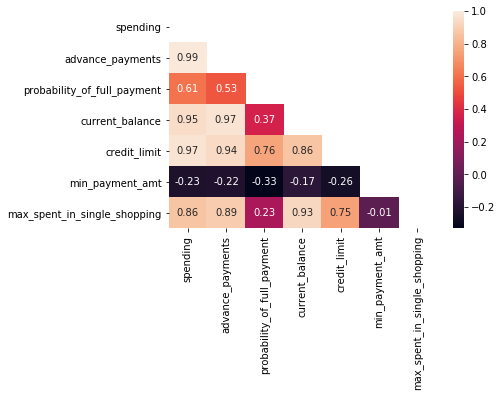

In [11]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)
plt.show()

Highly positively correleated variables
1. Advance_payments and Spending: 0.99 
2. Credit_Limit and Spending:0.97
3. Current balance and advance payments: 0.97
4. Current balance and Spending: 0.95
5. Credit_Limit and Advance payment: 0.94
6. Max_spent_in_single_shopping and Current_balance: 0.93
7. Max_spent_in_single_shopping and advance_payment: 0.89
8. Max_spent_in_single_shopping and Spending: 0.86
9. Credit_Limit and Current balance: 0.86

Slighltly negatively correleated variables
1. Min_payment_amt and probability of full payment: 0.33
2. Min_payment_amt and credit_limit: 0.26
3. Min_payment_amt and spending: 0.23
4. Min_payment_amt and advance_payments: 0.22
5. Min_payment_amt and current_balance: 0.17


#### Multivariate Analysis

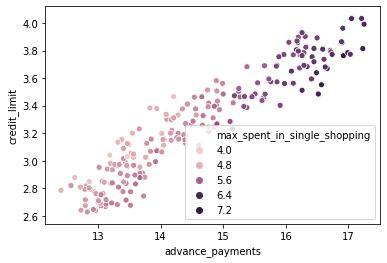

In [174]:
sns.scatterplot(x='advance_payments', y='credit_limit',hue='max_spent_in_single_shopping', data=df)
plt.show()

We observe increase in current balance and spending of the customer increases the probability of full payment.

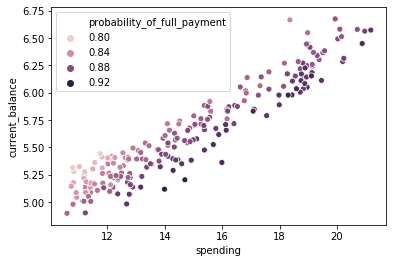

In [175]:
sns.scatterplot(x='spending', y='current_balance',hue='probability_of_full_payment', data=df)
plt.show()

We observe increase in credit limit increases the advance payment made by the customer through cash also increases the spending in a single shopping.

#### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


From the table above, it is clear that we should scale the data as they are not of a uniform range. For example, The standard deviation for spending is is 2.9 whereas it is 0.02 for probability of full payment.

We have to scale the data because using the data without scaling might create some sort of bias in the outcome of the analysis. It is always important to standardize the data we use to prevent bias in the outcome.

In [15]:
X = StandardScaler()
scaled_df= X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [16]:
scaled_df = pd.DataFrame(scaled_df, index = df.index, columns = df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


We can see the scaled data above.

#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [17]:
wardlink = linkage(scaled_df, method = 'ward')

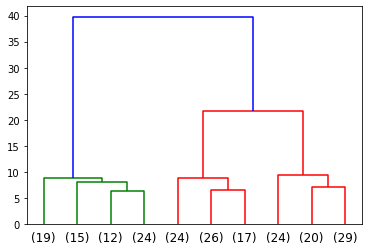

In [18]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

We can observe that it is best to split the customer profiles into 2 categories from the dendogram above.

We use the wardlinkage method and fclusters.

In [19]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [20]:
df['H_clusters'] = clusters

In [21]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [22]:
df['H_clusters'].value_counts()

2    140
1     70
Name: H_clusters, dtype: int64

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

Next we perform clustering using K-means method.

In [23]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [24]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [25]:
k_means.inertia_

659.171754487041

In [26]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [27]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.30172127754196

In [28]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

326.3521119821222

In [29]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

289.49756707129455

The WSS is observed to decrease as the number of clusters increase.

Optimum number of clusters might be 2 as there is the highest decrease in wss.

Now we use the K-elbow method to find out the optimum number of clusters.

In [30]:
wss =[] 

In [31]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [32]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.5811909715524,
 326.3625415410697,
 289.215290274911,
 262.52110911844665,
 240.91136022182457,
 222.4975656708286,
 204.15636280935374]

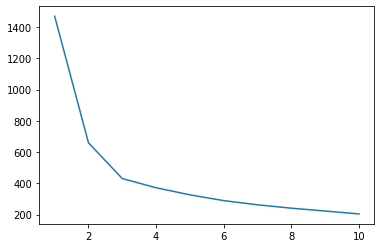

In [33]:
plt.plot(range(1,11), wss)

From the plot, we can observe that the optimum number of clusters is 2 as there is a major dip from 1 cluster to 2 clusters. From 2 to 3 clusters, there is a slight dip. Post 3 cliusters, the plot seems to get flatter and flatter.

We run the kmeans with 2 clusters and add the labels with our dataframe

In [34]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_

In [35]:
df["Km_clusters"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Km_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


Silhoutte score analysis is performed to verify the correctness of the mapping of clusters to the dataset

In [36]:
silhouette_score(scaled_df,labels)

0.46577247686580914

In [37]:
sil_width = silhouette_samples(scaled_df,labels)

In [176]:
df["sil_width"] = sil_width
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Km_clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.603797
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0,0.008748
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.678038
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.495306
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.548072


The silhouette scores are positive which means that the mapping of clusters to our dataset is correct.

In [39]:
df.Km_clusters.value_counts().sort_index()

0    133
1     77
Name: Km_clusters, dtype: int64

In [40]:
cust_pro = df.groupby('Km_clusters').mean()
cust_pro['freq'] = df.Km_clusters.value_counts().sort_index()
cust_pro

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,sil_width,freq
Km_clusters,,,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,2.000000,0.439683,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,1.090909,0.510837,77


#### Observations

##### 1. Cluster 0 (Conservative credit card users)
- 63% of these customers have an average spending of 13000 per month
- The probability of full payment is around 86%. 
- These customers have a lower credit limit, current balance and pay lesser advance payments.
- This can be observed from the max_spent in single shopping with an average spending of 5000.
- The minimum payment amount for these customers is about 3800 and slightly better than the liberal group.

##### 2. Cluster 1  (Liberal credit card users)
- 37% of these customers have an average spending of 18000 per month
- The probability of full payment is around 89%.
- These customers have a high credit limit, current balance and pay more advance payments. 
- This can be observed from the max_spent in single shopping with an average spending of 6000.
- The minimum payment amount for these customers is about 3500.

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### 1. Cluster 0  (Conservative credit card users) 

- Probability of full payment is high
- Maintain higher current balance
- It is important to not lose these customers
##### Promotional Strategy
- Main goal is to retain customers
- Can do so by providing them special benefits, privilages, special memberships, etc

#### 2. Cluster 1 (Liberal credit card users)
  
- Have lower spending limit
- Have a higher minimum payment amount
- Majority of customer base
- Need to get them to maintain a higher current balance
##### Promotional Strategy
- Need to get them to use more credit to make purchases
- Can do so by giving them more incentives to use their credit cards
- Such as cashbacks, discounts, points to avail, and spreading awareness about the perks of using credit

### Question 2

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

#### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [42]:
ins_df = pd.read_csv("insurance_part2_data-2.csv")

In [43]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [44]:
ins_df.shape

(3000, 10)

In [45]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [46]:
ins_df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no null values present in the dataset.

In [47]:
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


#### Univariate Analysis

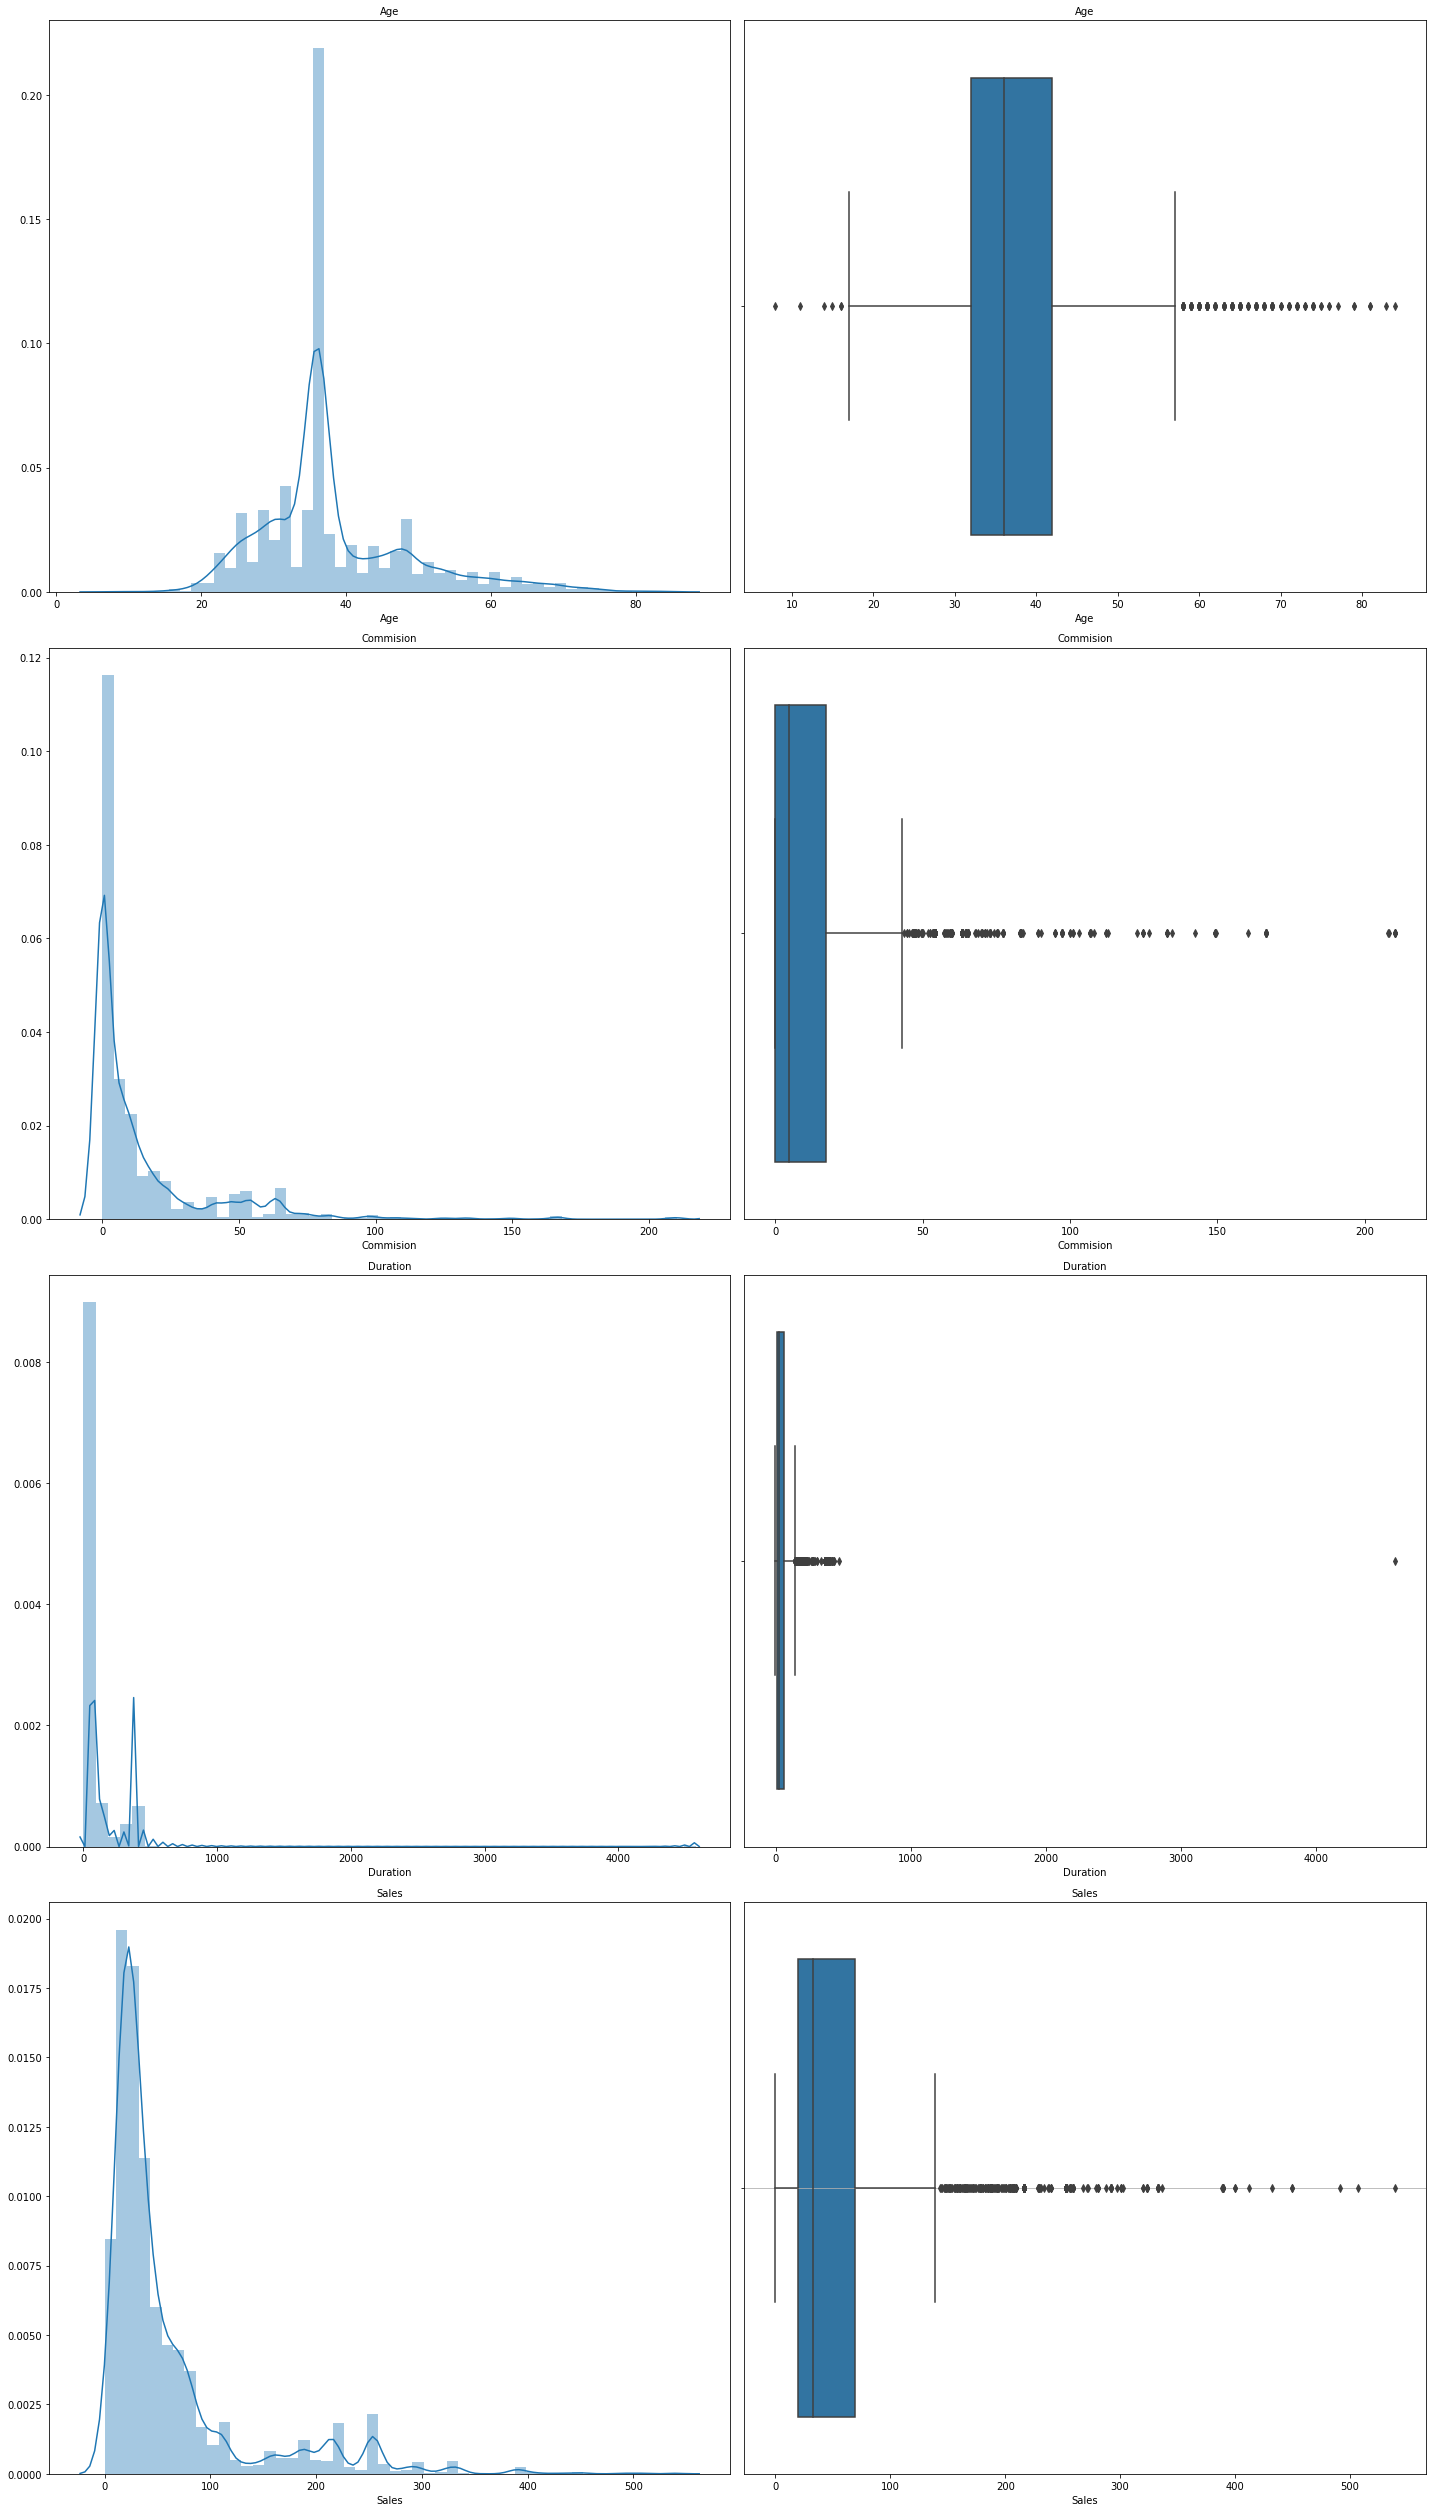

In [48]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(20, 35)

cont = ins_df.dtypes[(ins_df.dtypes == 'int64')|(ins_df.dtypes == 'float64')].index

ins_df2 = ins_df[cont]

for i in range(0, len(ins_df2.columns)):
    a = sns.distplot(ins_df2[ins_df2.columns[i]] , ax = axes[i][0])
    a.set_title(ins_df2.columns[i], fontsize = 10)
    a = sns.boxplot(ins_df2[ins_df2.columns[i]] , orient = "h" , ax = axes[i][1])
    a.set_title(ins_df2.columns[i], fontsize = 10)
    plt.grid()

plt.tight_layout()

1. Age: Does not follow a normal distribution.
2. Commision: Follows a heavily right skewed normal distribution.
3. Duration: Does not follow a normal distribution
4. Sales: Seems like a right skewed normal distribution but it does not follow a normal distribution.

We do observe outliers but we do not need to treat them as we perform classification using a tree based model.

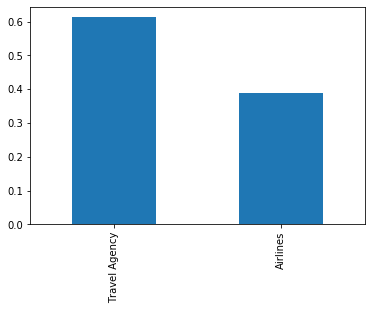

In [49]:
ins_df['Type'].value_counts(normalize=True).plot(kind='bar');
plt.show()

We observe 60% insurances taken are for travel agencies and the remaining 40% for airlines

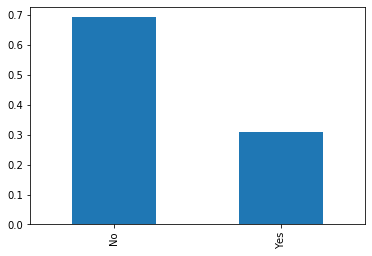

In [50]:
ins_df['Claimed'].value_counts(normalize=True).plot(kind='bar');

We observe that almost 70% do not claim the insurance and only 30% claim the insurance.

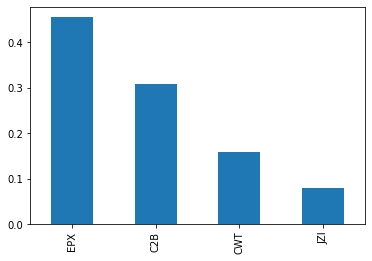

In [51]:
ins_df['Agency_Code'].value_counts(normalize=True).plot(kind='bar');

We can observe the agencies ranked from highest to lowest insurance policies given by the tour insurance provider. 

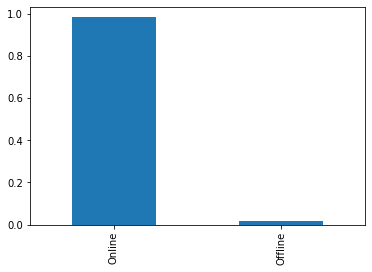

In [52]:
ins_df['Channel'].value_counts(normalize=True).plot(kind='bar');

We observe that almost all insurance policies are applied online.

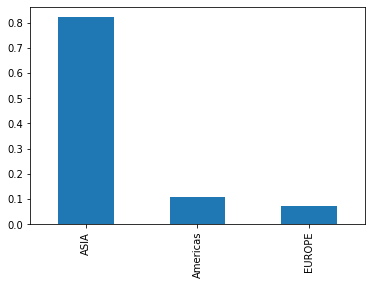

In [53]:
ins_df['Destination'].value_counts(normalize=True).plot(kind='bar');

We observe that almost 80% insurance policies are for Asia and approximately 10% for AMericas and Europe each.

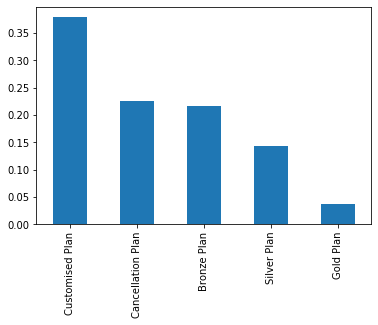

In [54]:
ins_df['Product Name'].value_counts(normalize=True).plot(kind='bar');

We can observe that most agencies prefer a customised plan. We can also observe that many do not prefer the gold plan offered by the company.

## Bivariate analysis

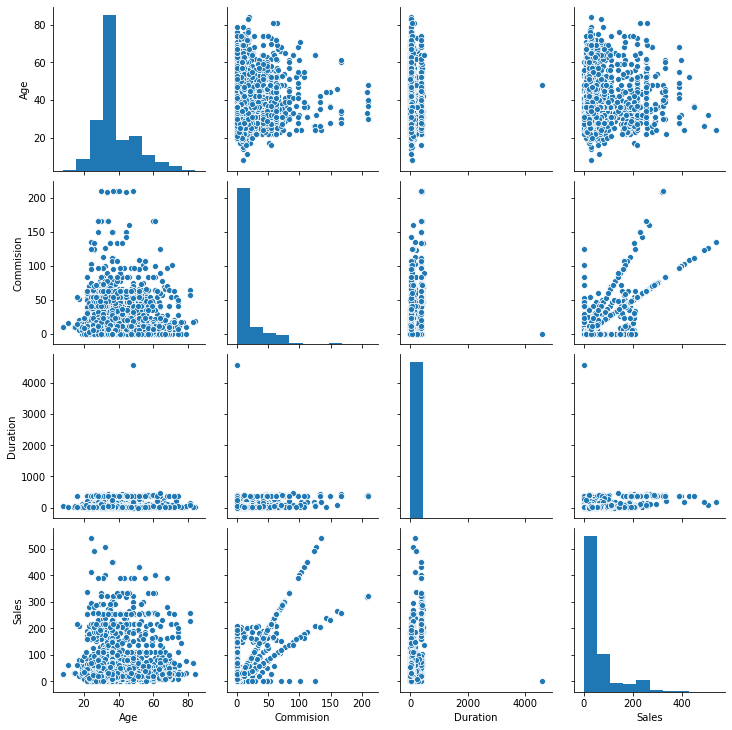

In [55]:
sns.pairplot(ins_df)
plt.show()

From the pairplot we can observe that commision and the volume of sales are directly proportional.

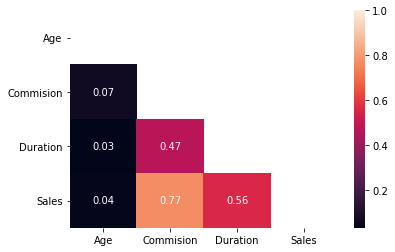

In [56]:
corr = ins_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)
plt.show()

Positively correlated variables
1. Sales and Commision: 0.77
2. Sales and Duration: 0.56
3. Duration and Commision: 0.47

Non correlated variables
1. Age and Duration: 0.03
2. Age and Sales: 0.04
3. Age and Commision: 0.07

The dataset does not contain negatively correlated variables.

#### Multivariate Analysis

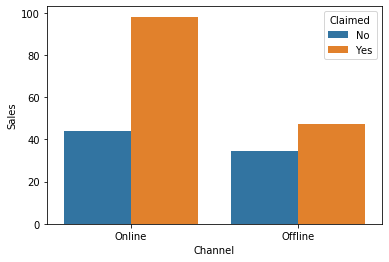

In [57]:
sns.barplot(x='Channel', y='Sales', hue='Claimed', data=ins_df, ci=None)
plt.show()

Sales are highest in the online channel compared to offline. The number of insurance policy holders who applied online who have claimed is almost 60% more than the number of insurance policy holders who applied offline.

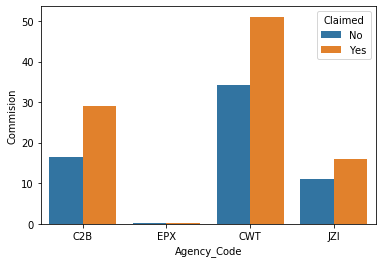

In [58]:
sns.barplot(x='Agency_Code', y='Commision', hue='Claimed', data=ins_df, ci=None)
plt.show()

The agency ranked by claims are as follows. CWT > C2B > JZI > EPX

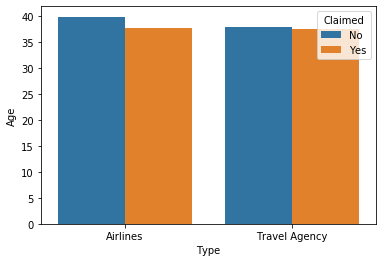

In [59]:
sns.barplot(x='Type', y='Age', hue='Claimed', data=ins_df, ci=None)
plt.show()

We can observe the average ages of the policy holders who have claimed and not claimed in the plot above.

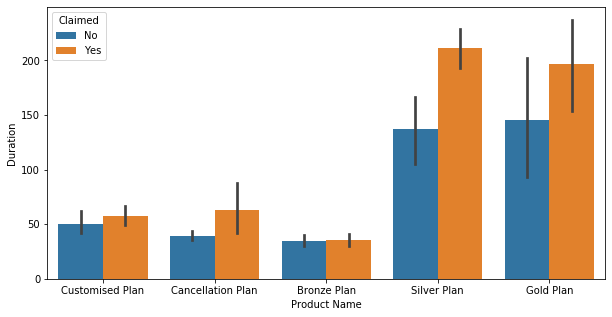

In [60]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Product Name", y="Duration", hue="Claimed", ax=ax, data=ins_df)
plt.show()

The highest insurance plans claimed and not claimed are silver and gold and the duration of the policy is more than 100 days.

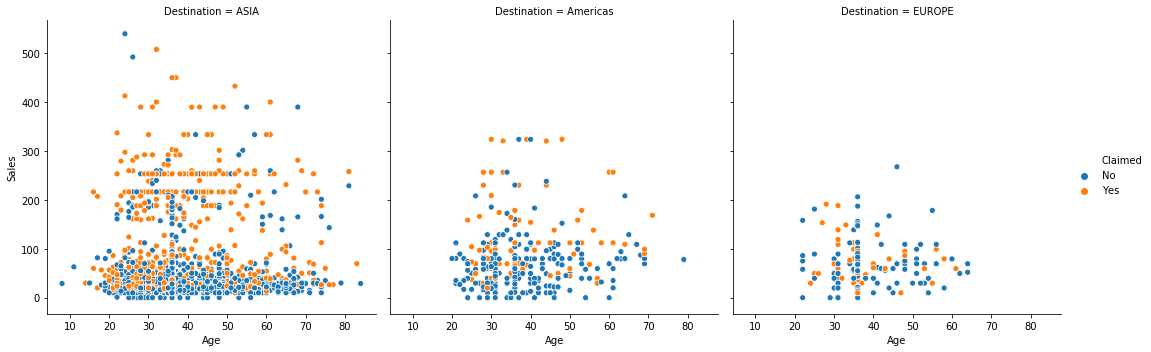

In [61]:
sns.relplot(x="Age", y="Sales", hue="Claimed", col="Destination", data=ins_df);

We observe that: 
- 80% of the sales are from Asia
- Most of the sales of the tour insurance are between the age of 20 & 50 for the all the destinations

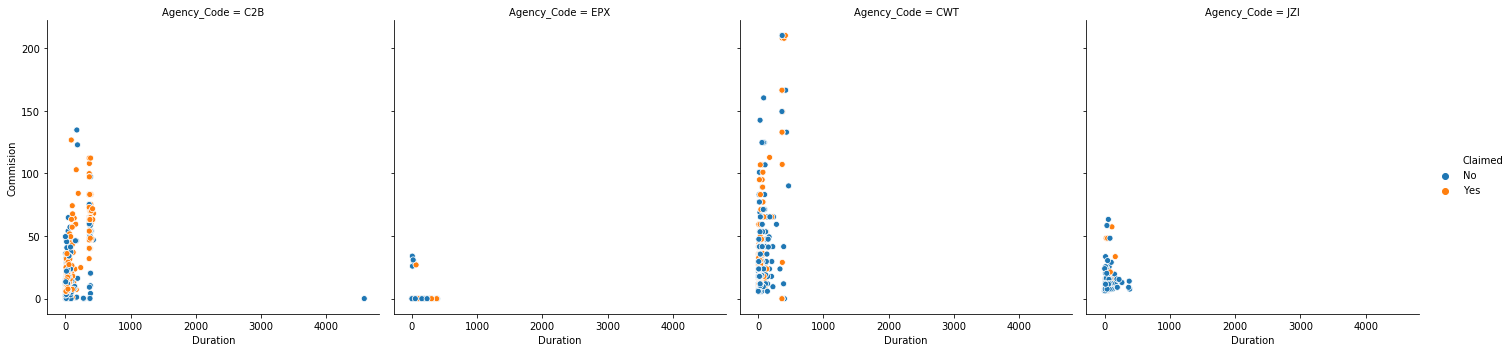

In [62]:
sns.relplot(x="Duration", y="Commision", hue="Claimed",col="Agency_Code",data=ins_df);

- The commision amount does notimpactthe duration of the tour insurance or the outcome of the claim status.
- We can observe that C2B and CWT agency code have the most number of claims

#### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [63]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [64]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes


In [65]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [66]:
X = ins_df.drop("Claimed", axis=1)
y = ins_df.pop("Claimed")

In [67]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [68]:
print('X_train has 2100 values')
print('X_test has 900 values')
print('A training test split of 70:30 is good')

X_train has 2100 values
X_test has 900 values
A training test split of 70:30 is good


In [69]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [70]:
y_predict = dt_model.predict(X_test)

In [71]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,min_samples_leaf=10,min_samples_split=35)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=35)

In [72]:
train_char_label = ['No', 'Yes']
Ins_tree_regularized = open('d:\Ins_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= Ins_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))
Ins_tree_regularized.close()

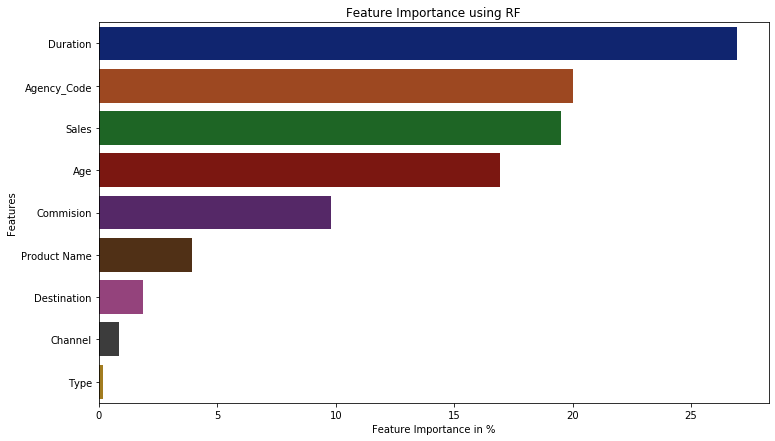

In [73]:
x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [74]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

Training confusion matrix, score, AUC & ROC

In [75]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

0.8128571428571428

In [76]:
confusion_matrix(train_labels, ytrain_predict)

array([[1312,  159],
       [ 234,  395]], dtype=int64)

In [77]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1471
           1       0.71      0.63      0.67       629

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



AUC: 0.883


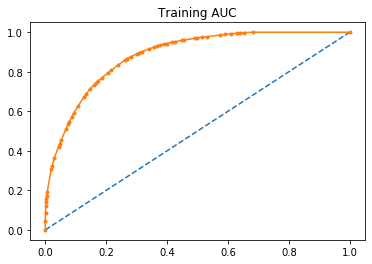

In [78]:
# AUC for the training data
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Training AUC')
# show the plot
plt.show()

In [80]:
#Test Data Accuracy

reg_dt_model.score(X_test,test_labels)

0.7611111111111111

In [81]:
confusion_matrix(test_labels, ytest_predict)

array([[533,  72],
       [143, 152]], dtype=int64)

In [82]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       605
           1       0.68      0.52      0.59       295

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.75       900



- Higher precision score for claim status "No" compared to the claim status "Yes".
- High recall value of 89% which means that if the claim status is 'No' which is 70% of the claims are originally detected correctly.
- Good F1 score with 83% for the testing data.

- Recall value is 52% if the claim status is "Yes" which is 30% of claims received from the customer.
- Poor f1 score at 0.59
- Accuracy is 0.76

- Important to make sure that the customer who is not eligible for a claim is correctly identified because wrong identification of a claim since expenses will exceed the premiums which will result in a loss. 

AUC: 0.787


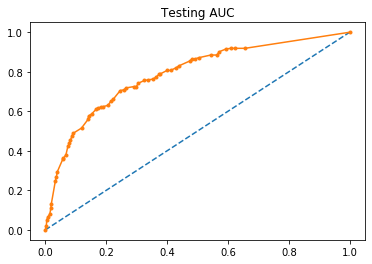

In [83]:
# AUC for the test data

# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('Testing AUC')
# show the plot
plt.show()

#### Observations (CART Model)
- Model gives most importance to Duration, Agency Code, Age, and Sales
- Duration and Sales are important parameters for the management because more sales mean more policies sold and longer duration of the policies mean more premiums
- Risk is higher as the the age of the customers increases.



## Random Forest Algorithm

In [85]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [86]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [87]:
#Perform grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': [8, 10],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [30, 45, 60],
    'n_estimators': [501, 1001]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [88]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': [8],
                         'min_samples_leaf': [10], 'min_samples_split': [45],
                         'n_estimators': [501]})

In [89]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 501}

By re running the model multiple times, I had found the best parameters for the model.

In [90]:
best_grid = grid_search.best_estimator_

In [91]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

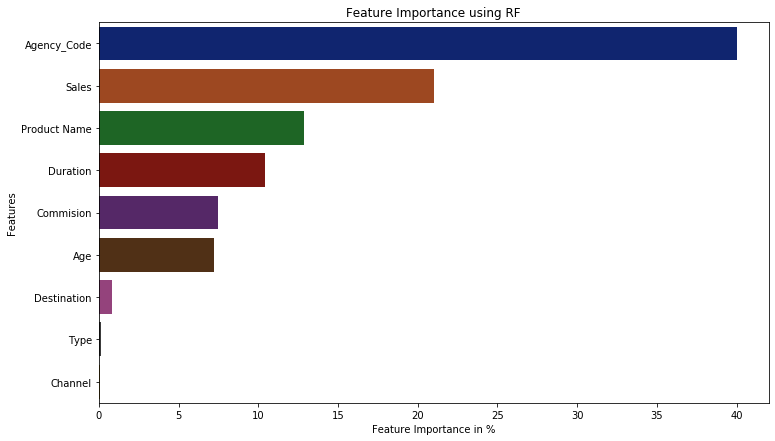

In [92]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

Agency code, Product Name, Sales and Commision variables contributes to more than 80% of the critical features

In [93]:
#Train Data Accuracy
best_grid.score(X_train,train_labels)

0.820952380952381

In [94]:
confusion_matrix(train_labels, ytrain_predict)

array([[1341,  130],
       [ 246,  383]], dtype=int64)

In [95]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1471
           1       0.75      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.80      0.76      0.77      2100
weighted avg       0.82      0.82      0.82      2100



AUC: 0.879


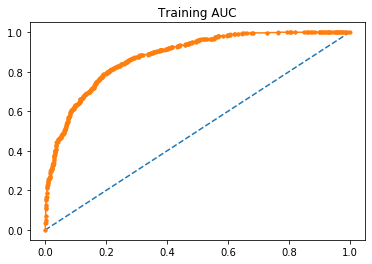

In [96]:
# AUC for the training data
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Training AUC')
# show the plot
plt.show()

In [98]:
#Test Data Accuracy

reg_dt_model.score(X_test,test_labels)

0.7611111111111111

In [99]:
confusion_matrix(test_labels, ytest_predict)

array([[557,  48],
       [156, 139]], dtype=int64)

In [100]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       605
           1       0.74      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



### Observations (RF Model)

- Higher precision score for claim status "No" compared to the claim status "Yes".
- High recall value of 92% which means that if the claim status is 'No' which is 70% of the claims are originally detected correctly.
- Good F1 score with 85% for the testing data

- Recall value is 47% if the claim status is "Yes" which is 30% of claims received from the customer.
- Recall value lower than 0.5. Hence it is not good.
- F1 score is also poor at 0.58
- Accuracy is 0.77

#### This model performs 1% better than CART model.

AUC: 0.819


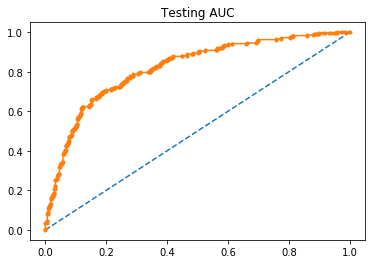

In [101]:
# AUC for the test data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('Testing AUC')
# show the plot
plt.show()

#### Observations
- Model gives most importance to Agency Code, Sales Product Name, and Duration
- Duration and Sales are important parameters for the management because more sales mean more policies sold and longer duration of the policies mean more premiums
- Agency code helps to identify which agency puts more claims.
- Product name helps to identify which product gives more claims which is unnecessary.


## Neural Network

In [84]:
from sklearn.neural_network import MLPClassifier

In [85]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y, test_size= 0.30, random_state=1)

In [87]:
from sklearn.preprocessing import StandardScaler

In [104]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
# Apply the transformation on the test data
X_test = ss.transform(X_test)

In [107]:
#Building Neural Network

clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
# Fit the model on the training data
clf.fit(X_train, train_labels)

Iteration 1, loss = 0.64459932
Iteration 2, loss = 0.62689739
Iteration 3, loss = 0.60662904
Iteration 4, loss = 0.58889576
Iteration 5, loss = 0.57375106
Iteration 6, loss = 0.56124855
Iteration 7, loss = 0.55072503
Iteration 8, loss = 0.54232804
Iteration 9, loss = 0.53526864
Iteration 10, loss = 0.52917396
Iteration 11, loss = 0.52400864
Iteration 12, loss = 0.51943619
Iteration 13, loss = 0.51564861
Iteration 14, loss = 0.51213112
Iteration 15, loss = 0.50922260
Iteration 16, loss = 0.50660266
Iteration 17, loss = 0.50425722
Iteration 18, loss = 0.50217408
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [108]:
# use the model to predict the training data
y_pred = clf.predict(X_train)

In [110]:
clf.score(X_train, train_labels)

0.7595238095238095

Fine tuning the model

In [160]:
#Perform grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(81, 81, 81)],
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01, 0.001],
    'max_iter' : [1000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [161]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(81, 81, 81)],
                         'max_iter': [1000], 'solver': ['sgd', 'adam'],
                         'tol': [0.01, 0.001]})

In [162]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (81, 81, 81),
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.01}

By re running the model multiple times, I had found the best parameters for the model.

In [163]:
# use the model to predict the training data
best_grid = grid_search.best_estimator_

In [164]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [165]:
#Train Data Accuracy
best_grid.score(X_train,train_labels)

0.790952380952381

In [166]:
confusion_matrix(train_labels, ytrain_predict)

array([[1268,  203],
       [ 236,  393]], dtype=int64)

In [167]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1471
           1       0.66      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



AUC: 0.504


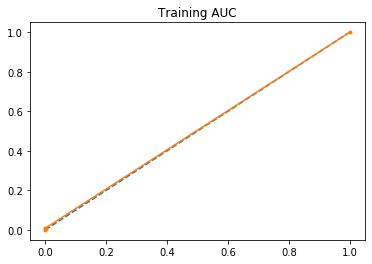

In [168]:
# AUC for the training data
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Training AUC')
# show the plot
plt.show()

In [169]:
#Test Data Accuracy

best_grid.score(X_test,test_labels)

0.7688888888888888

In [170]:
confusion_matrix(test_labels, ytest_predict)

array([[537,  68],
       [140, 155]], dtype=int64)

In [171]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       605
           1       0.70      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



- Higher precision score for claim status "No" compared to the claim status "Yes".
- High recall value of 89% which means that if the claim status is 'No' which is 70% of the claims are originally detected correctly.
- Good F1 score with 84% for the training data

- Recall value is 53% if the claim status is "Yes" which is 30% of claims received from the customer.
- Recall value is above 0.5 which is acceptable.
- F1 score is very average at 0.6
- Accuracy is 0.77

#### This model performs exactly as the CART model.

AUC: 0.501


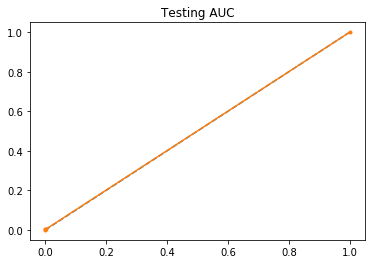

In [172]:
# AUC for the test data

# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('Testing AUC')
# show the plot
plt.show()

#### Observations
- Model performs very poorly and we do not use ANN model


#### Conclusion & Recomendations

- We use the CART model as it takes the most relevant parameters for its model.

- Models can be used to identify who will not claim more accurately than who will claim.
- Business should use Duration, Age and Agency code to predict future claims